# Probabilidade e Estatística

## Curso Superior de Tecnologia em Ciência de Dados

### Prof. Dr. Neylson Crepalde

Conteúdo abordado: distribuições contínuas de probabilidade

---

# A distribuição uniforme

Quando uma variável aleatória pode tomar qualquer valor numa escala contínua entre dois pontos de tal maneira que nenhum valor seja mais provável que outro, então as probabilidades associadas à variável podem ser descritas pela distribuição uniforme. 

Graficamente a distribuição uniforme é representada como um retângulo limitado por dois pontos *a* e *b*, que representam o âmbito, ou intervalo, de resultados possíveis. 

A altura do retângulo é considerada como sendo 1, e a área é considerada como 100%. Consequentemente, a *área* sob o retângulo entre dois pontos *c* e *d*, é igual à percentagem da área total compreendida entre *c* e *d*. 

$$P(c \leq x \leq d) = \frac{d-c}{b-a}$$

In [44]:
using Distributions, StatsPlots, LaTeXStrings, KernelDensity

In [18]:
d = Uniform()

Uniform{Float64}(a=0.0, b=1.0)

In [35]:
rectangle(w, h, x, y) = Shape(x .+ [0,w,w,0], y .+ [0,0,h,h])

rectangle (generic function with 1 method)

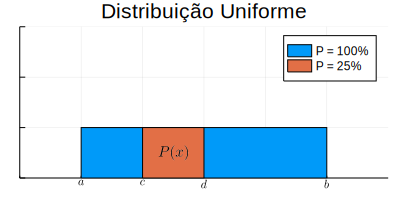

In [66]:
plot(rectangle(4, 1, 1, 0), label="P = 100%", size=(400,200))
plot!(rectangle(1, 1, 2, 0), label="P = 25%")
ylims!(0,3)
xlims!(0, 6)
xticks!([0,1,2,3,4,5],["", L"a", L"c", L"d", "", L"b"])
yticks!([0,1,2,3], ["", "", "", ""])
title!("Distribuição Uniforme")
annotate!(2.5, 0.5, text(L"P(x)", :black, :center, 10))

#### Exemplo

Suponhamos que um vendedor compareça ao escritório de sua firma diariamente entre 3:00 e 4:00, e que nenhum momento seja mais provável que qualquer outro nesse intervalo de tempo. Como o tempo é medido em escala contínua, a probabilidade do comparecimento entre dois pontos no tempo é igual à razão daquele intervalo para o intervalo de 1 hora. Daí, a probabilidade de o comparecimento ocorrer entre 3:00 e 3:15 é $\frac{15}{60} = 0,25$. A probabilidade de o comparecimento ocorrer precisamente às 3:15 é considerada aproximadamente igual a zero. Quando dizemos isso, não pretendemos afirmar que tal ocorrência seja impossível, e sim que, com um âmbito infinito de possibilidades, seria impossível *predizer* tal ocorrência num momento exato do tempo.

Na distribuição uniforme a média é dada por 

$$\mu = \frac{a+b}{2}$$

e a variância é dada por 

$$\sigma^2 = \frac{(b-a)^2}{12}$$

---

# Exercícios
Stevenson (1981, p. 135-6) 1, 2, 3 e 4.

# Distribuições normais

A distribuição normal costuma designar-se também pelo nome de distribuição Gaussiana, em razão da contribuição de Karl F. Gauss (1777-1855) à sua teoria matemática.

A distribuição normal possui o formato de "sino" e é suave, unimodal e simétrica em relação à sua média. Ela se prolonga indefinidamente em qualquer das direções a partir da média. Tende cada vez mais para o eixo horizontal à medida que aumenta a distância a contar da média, mas nunca chega a tocar o eixo. Teoricamente, os valores possíveis vão de $-\infty$ a $+\infty$. Outra característica importante dessa distribuição é que ela é completamente especificada por dois parâmetros: a média e o desvio padrão. 

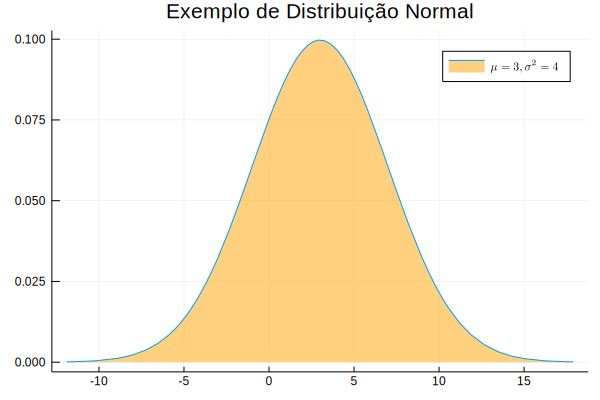

In [97]:
plot(Normal(3, 4), label=L"\mu = 3, \sigma^2 = 4", fill=(0, .5,:orange))
title!("Exemplo de Distribuição Normal")

## A ditribuição Normal como modelo

É essencial reconhecer que uma distribuição normal é uma distribuição teórica. Para mensurações físicas agrupadas numa distribuição de frequência, é uma distribuição ideal; nenhum conjunto de valores efetivos se adaptará exatamente a ela. Assim, quando se diz que uma variável aleatória (física) é distribuída normalmente, a afirmação deve ser interpretada como uma implicação de que a distribuição de frequência de seus resultados possíveis pode ser satisfatoriamente bem aproximada pela distribuição normal de probabilidades. Logo, a curva normal é um *modelo*.

# A distribuição Normal Padronizada

A distribuição normal constitui, na realidade, uma "família" infinitamente grande de distribuições - uma para cada combinação possível de média e desvio padrão. Consequentemente seria inútil procurar elaborar tabelas que atendessem a todas as necesidades. Além disso, a expressão da distribuição normal não é conveniente para tal objetivo, em vista de sua complexidade. A fórmula da distribuição normal, por exemplo, é

$$f(x) = \frac{1}{\sqrt{2\pi \sigma}} e^{-\frac{1}{2} (\frac{x-\mu}{\sigma})^2 }$$

Podemos contornar esse problema, entretanto, de uma forma simples. Se uma variável tem distribuição normal, cerca de 68% de seus valores cairão no intervalo de um desvio padrão a contar de cada lado da média; cerca de 95,5% no intervalo de dois desvios padrões a contar da média e cerca de 99,7% dentro de três desvios padrões a contar da média. Isso é válido para *todas* as distribuições normais. 

O problema de trabalhar uma família infinita de distribuições normais pode ser completamente evitado, portanto, se passarmos a trabalhar com valores *relativos*, ao invés de valores reais. Isso equivale a tomar a média como ponto de referência (origem) e o desvio padrão como medida de afastamento a contar daquele ponto (unidade de medida). Esta nova escala é comumente conhecida como *escala z*. Variáveis apresentadas nessa escala são chamadas de variáveis *padronizadas*.

A figura abaixo ilustra uma variável aleatória padronizada que possui distribuição normal.

In [184]:
function npdensity(z)
    n = size(z,2)
    for i = 1:n
        x = z[:,i]
        y = kde(x)
        desv = std(x)
        m = mean(x)

        Plots.plot(range(-(desv*3), stop=-(desv*2), length=100),z->pdf(y,z), color=:red, fill=(0,0.5,:red), label=L"-3\sigma")
        Plots.plot!(range(-(desv*2), stop=-(desv*1), length=100),z->pdf(y,z), color=:orange, fill=(0,0.5,:orange), label=L"-2\sigma")
        Plots.plot!(range(-(desv*1), stop=m, length=100),z->pdf(y,z), color=:green, fill=(0,0.5,:green), label=L"-\sigma")
        
        Plots.plot!([m,m],[0,pdf(y,m)],color=:black, label=L"\mu")
        
        Plots.plot!(range(m, stop=desv, length=100),z->pdf(y,z), color=:green, fill=(0,0.5,:green), label=L"\sigma")
        Plots.plot!(range(desv, stop=desv*2, length=100),z->pdf(y,z), color=:orange, fill=(0,0.5,:orange), label=L"2\sigma")
        Plots.plot!(range(desv*2, stop=desv*3, length=100),z->pdf(y,z), color=:red, fill=(0,0.5,:red), label=L"3\sigma")
    end
end

npdensity (generic function with 2 methods)

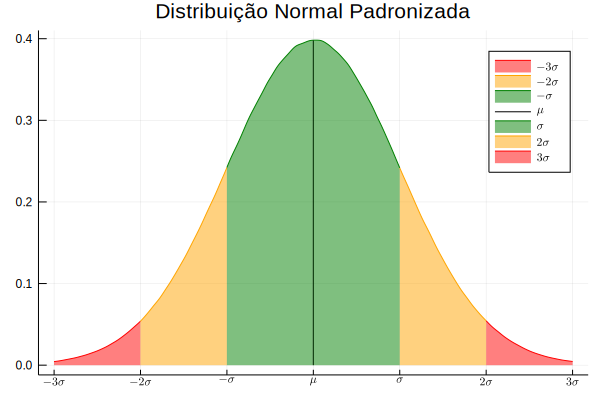

In [186]:
vetor = rand( Normal( 0 , 1 ),10000000)
npdensity(vetor)
xticks!(-3:3, [L"-3\sigma", L"-2\sigma", L"-\sigma", L"\mu", L"\sigma", L"2\sigma", L"3\sigma"])
title!("Distribuição Normal Padronizada")

Podemos converter a diferença efetiva entre a média e algum outro valor da distribição para uma diferença relativa exprimindo-a em termos do número de desvios padrões a contar da média. Algebricamente, pode-se escrever

$$z = \frac{x - \mu}{\sigma}$$

onde $z$ = número de desvios padrões a contar da média, $x$ = valor arbitrário, $\mu$ = a média da distribuição normal e $\sigma$ = o desvio padrão.